In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()


# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
# to check the column title
fr_M = session.query(Measurement).first()
fr_M.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1cee452cee0>,
 'tobs': 65.0,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08}

In [102]:
# to check the column title
fr_S = session.query(Station).first()
fr_S.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1cee452cdc0>,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'id': 1,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'elevation': 3.0}

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

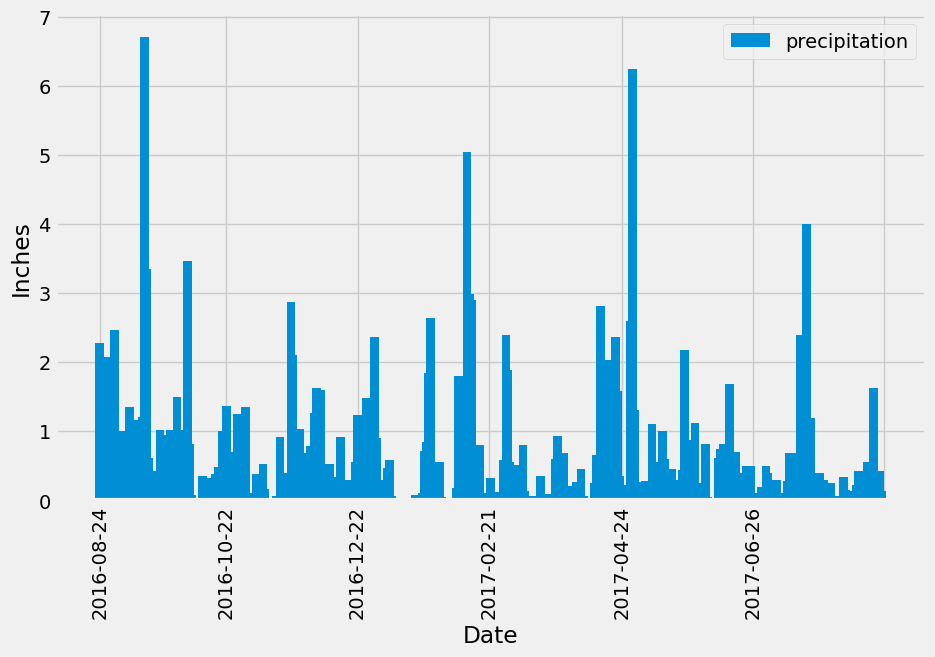

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

last_12_of_rain = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_12_of_rain_str = last_12_of_rain[0]
last_12_of_rain_str

# Calculate the date one year from the last date in data set.
#https://stackoverflow.com/questions/30112357/typeerror-descriptor-strftime-requires-a-datetime-date-object-but-received
oneyear_from_last_date = dt.datetime.strptime(last_12_of_rain_str, "%Y-%m-%d") - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precp_and_date = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= oneyear_from_last_date).all()
    
    
# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_DF = pd.DataFrame(precp_and_date)

# Sort the dataframe by date
prcp_DF = prcp_DF.sort_values('date')
prcp_DF = prcp_DF.sort_index(ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
import matplotlib
x_axis = prcp_DF['date']
y_axis = prcp_DF['prcp']
plt.figure(figsize=(10, 6))
plt.xlabel("Date")
plt.ylabel("Inches")
plt.bar(x_axis, y_axis, width = 4)
plt.legend(["precipitation"])
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(matplotlib.dates.MonthLocator(interval=2))
#https://stackoverflow.com/questions/42881610/monthlocator-in-matplotlib
plt.show()

In [90]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_stats = prcp_DF['prcp'].describe()
prcp_summary = pd.DataFrame(prcp_stats)
prcp_summary = prcp_summary.rename({'prcp':'precipitation'}, axis=1)
prcp_summary

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

## Setup

In [103]:
# to check the column title
fr_M = session.query(Measurement).first()
fr_M.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1cee452cee0>,
 'tobs': 65.0,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08}

In [ ]:
# to check the column title
fr_S = session.query(Station).first()
fr_S.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1cee452cdc0>,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'id': 1,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'elevation': 3.0}

In [99]:
# Design a query to calculate the total number of stations in the dataset
total_num_stations = session.query(Station.id).order_by(Station.id.desc()).first()
total_num_stations

(9,)

In [139]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [108]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_stations_id = most_active_stations[0][0]
station_stats = session.query(func.min(Measurement.tobs),
                              func.max(Measurement.tobs),
                              func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_stations_id).all()
station_stats



[(54.0, 85.0, 71.66378066378067)]

In [141]:
last_12_of_tobs = session.query(Measurement.station, Measurement.tobs).\
    filter(Measurement.station == most_active_stations_id).\
        filter(Measurement.date >= oneyear_from_last_date).all()

station_df = pd.DataFrame(last_12_of_tobs)
station_df

,station,tobs
0,USC00519281,77.0
1,USC00519281,80.0
2,USC00519281,80.0
3,USC00519281,75.0
4,USC00519281,73.0
...,...,...
346,USC00519281,77.0
347,USC00519281,77.0
348,USC00519281,76.0
349,USC00519281,76.0


<function matplotlib.pyplot.show(close=None, block=None)>

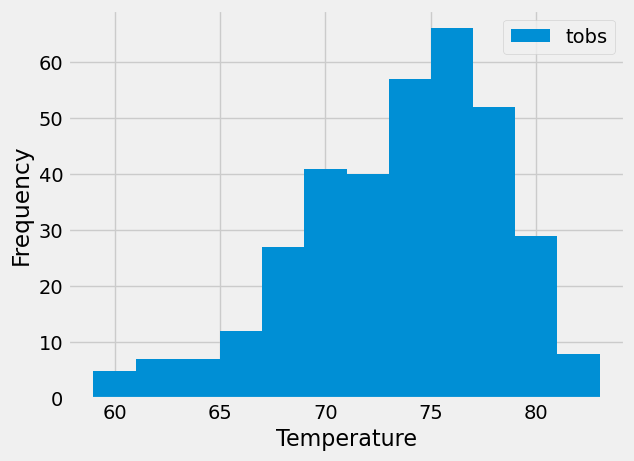

In [136]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

import matplotlib
x_axis_tob = station_df['tobs']
plt.hist(x_axis_tob, bins=12)
plt.xlabel("Temperature", fontsize=16)
plt.ylabel("Frequency")
plt.legend(["tobs"])
plt.show

# Close Session

In [137]:
# Close Session
session.close()